In [11]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas_datareader.data as web
from datetime import datetime

now_time = datetime.now()
start_time = datetime(now_time.year - 20, now_time.month , now_time.day)
now_time
start_time


In [12]:
now_time = datetime.now()
start_time = datetime(now_time.year - 5, now_time.month , now_time.day)
now_time
start_time

datetime.datetime(2015, 1, 11, 0, 0)

In [13]:
stock_df = web.DataReader('AAPL','yahoo', start_time, now_time)

In [14]:
#start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

#sp_df=web.DataReader('^GSPC','yahoo', start_time, now_time)    

In [16]:
stock_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.799988
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,298.390015
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,303.190002
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,309.630005
2020-01-10,312.670013,308.250000,310.600006,310.329987,35217272.0,310.329987


In [17]:
stock_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.799988
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,298.390015
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,303.190002
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,309.630005
2020-01-10,312.670013,308.250000,310.600006,310.329987,35217272.0,310.329987


In [18]:
# Get the Adjusted Close Price

df = stock_df[['Volume','Adj Close']]
#Take a look at the new data
df.head() 

#df.to_csv('data_stocks.csv')

,Volume,Adj Close
Date,,
2015-01-12,49650800.0,100.380791
2015-01-13,67091900.0,101.272049
2015-01-14,48956600.0,100.886154
2015-01-15,60014000.0,98.148056
2015-01-16,78513300.0,97.385445


In [19]:
df.tail() 

,Volume,Adj Close
Date,,
2020-01-06,29596800.0,299.799988
2020-01-07,27218000.0,298.390015
2020-01-08,33019800.0,303.190002
2020-01-09,42527100.0,309.630005
2020-01-10,35217272.0,310.329987


In [20]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
#df['InitialPrediction'] = df[['Adj Close']].shift()
#df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
#print the new data set
df.head(30) 

,Volume,Adj Close
Date,,
2015-01-12,49650800.0,100.380791
2015-01-13,67091900.0,101.272049
2015-01-14,48956600.0,100.886154
2015-01-15,60014000.0,98.148056
2015-01-16,78513300.0,97.385445
2015-01-20,49899900.0,99.893822
2015-01-21,48575900.0,100.656441
2015-01-22,53796400.0,103.275063
2015-01-23,46464800.0,103.807991


In [21]:
df.tail()

,Volume,Adj Close
Date,,
2020-01-06,29596800.0,299.799988
2020-01-07,27218000.0,298.390015
2020-01-08,33019800.0,303.190002
2020-01-09,42527100.0,309.630005
2020-01-10,35217272.0,310.329987


In [22]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Adj Close'],1))

#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[49650800.]
 [67091900.]
 [48956600.]
 ...
 [16331300.]
 [21005100.]
 [26301900.]]


In [23]:
df.head()

,Volume,Adj Close
Date,,
2015-01-12,49650800.0,100.380791
2015-01-13,67091900.0,101.272049
2015-01-14,48956600.0,100.886154
2015-01-15,60014000.0,98.148056
2015-01-16,78513300.0,97.385445


In [24]:
df.tail()

,Volume,Adj Close
Date,,
2020-01-06,29596800.0,299.799988
2020-01-07,27218000.0,298.390015
2020-01-08,33019800.0,303.190002
2020-01-09,42527100.0,309.630005
2020-01-10,35217272.0,310.329987


In [25]:
## Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Adj Close'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y[:-forecast_out])




[100.38079071 101.27204895 100.88615417 ... 235.50296021 235.16397095
 234.6156311 ]


In [26]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [27]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  -0.0489338837199913


In [29]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)


lr confidence:  0.10250496203558412


In [31]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Adj Close'],1))[-forecast_out:]
print(x_forecast) 

[[16308900.]
 [11654400.]
 [23621800.]
 [28607600.]
 [16795400.]
 [18606100.]
 [26518900.]
 [32010600.]
 [22605100.]
 [19689200.]
 [34327600.]
 [33396900.]
 [32046500.]
 [28539600.]
 [29007100.]
 [24592300.]
 [68994500.]
 [24643000.]
 [12119700.]
 [23280300.]
 [36566500.]
 [36028600.]
 [25201400.]
 [33870100.]
 [36580700.]
 [29596800.]
 [27218000.]
 [33019800.]
 [42527100.]
 [35217272.]]


# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
#x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast[0])

In [32]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)
lr_pdf=pd.DataFrame(lr_prediction)
lr_pdf

[163.06661201 166.90036072 157.04323228 152.93660336 162.66589899
 161.17448878 154.65699243 150.13367139 157.88065248 160.28237723
 148.2252396  148.99182461 150.10410181 152.99261258 152.60754919
 156.2438654  119.67132766 156.20210559 166.51710939 157.32451387
 146.38113605 146.82418545 155.74217106 148.60206633 146.36944
 152.12183395 154.08116823 149.30242868 141.47159849 147.49244792]


,0
0,163.066612
1,166.900361
2,157.043232
3,152.936603
4,162.665899
5,161.174489
6,154.656992
7,150.133671
8,157.880652
9,160.282377


In [33]:
df.tail()

,Volume,Adj Close
Date,,
2020-01-06,29596800.0,299.799988
2020-01-07,27218000.0,298.390015
2020-01-08,33019800.0,303.190002
2020-01-09,42527100.0,309.630005
2020-01-10,35217272.0,310.329987


In [34]:
df.tail()

,Volume,Adj Close
Date,,
2020-01-06,29596800.0,299.799988
2020-01-07,27218000.0,298.390015
2020-01-08,33019800.0,303.190002
2020-01-09,42527100.0,309.630005
2020-01-10,35217272.0,310.329987


In [35]:
df.tail()

,Volume,Adj Close
Date,,
2020-01-06,29596800.0,299.799988
2020-01-07,27218000.0,298.390015
2020-01-08,33019800.0,303.190002
2020-01-09,42527100.0,309.630005
2020-01-10,35217272.0,310.329987


In [36]:
#Error 
from sklearn.metrics import mean_squared_error,r2_score
#df['InitialPrediction'] = df[['Adj Close']].shift()
Y_orginal= np.array(df.drop(['Volume'],1))
Y_true=Y_orginal[-30:]
Y_pred=lr_prediction
#mean_squared_error(Y_orginal[-30:], lr_prediction)
MSE = np.square(np.subtract(Y_true,Y_pred)).mean() 
MSE 

rmse=r2_score(Y_true, Y_pred)
rmse

-80.31440468518736

In [37]:
# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction) 

[146.7327547 146.7327547 146.7327547 146.7327547 146.7327547 146.7327547
 146.7327547 146.7327547 146.7327547 146.7327547 146.7327547 146.7327547
 146.7327547 146.7327547 146.7327547 146.7327547 146.7327547 146.7327547
 146.7327547 146.7327547 146.7327547 146.7327547 146.7327547 146.7327547
 146.7327547 146.7327547 146.7327547 146.7327547 146.7327547 146.7327547]


In [38]:
dt=datetime.today().strftime('%Y-%m-%d')

df.tail(30) 
new_df= df.tail(30) 
new_df['Prediction']=lr_prediction

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [39]:
new_df.head()


,Volume,Adj Close,Prediction
Date,,,
2019-11-27,16308900.0,267.839996,163.066612
2019-11-29,11654400.0,267.250000,166.900361
2019-12-02,23621800.0,264.160004,157.043232
2019-12-03,28607600.0,259.450012,152.936603
2019-12-04,16795400.0,261.739990,162.665899


([<matplotlib.axis.XTick at 0x132130c18>,
 <a list of 30 Text xticklabel objects>)

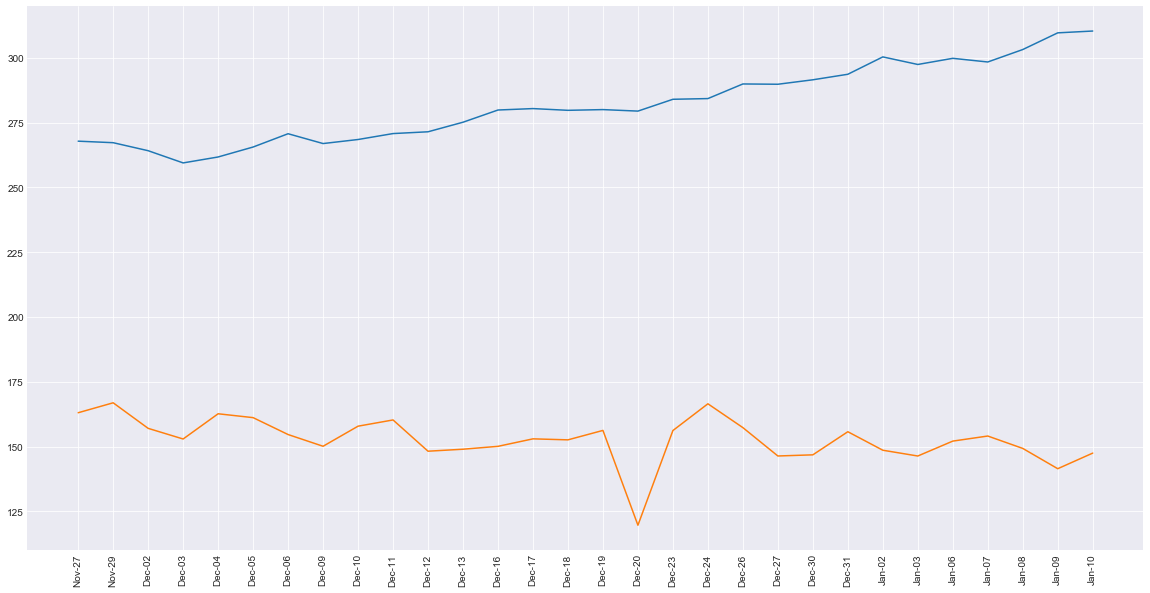

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
 
plt.rc('figure', figsize=(20, 10))
# create a color palette
#plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
x = new_df.index
labels=x.strftime("%b-%d")
ax.plot(x.strftime("%b-%d"), new_df['Adj Close']);
ax.plot(x.strftime("%b-%d"), new_df['Prediction']); 
plt.xticks(x.strftime("%b-%d"), labels, rotation='vertical')

In [ ]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Sort DataFrame by date
df = df.sort_values('Adj Close')
# df = df.reset_index()
# Double check the result
df.head()


In [ ]:
from datetime import date
from datetime import datetime
from datetime import timedelta
today = str(datetime.now())
last_30_days = datetime.now() - timedelta(days=30)
last_30_days = str(last_30_days)

In [ ]:

dates = df.loc[last_30_days : today]
dates

In [ ]:
# plt.figure(figsize = (18,9))

dates.plot(kind = 'line')
# plt.plot(range(df.shape[0]),(df['Adj Close'])
#plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel[('Adj Close',fontsize=18)
plt.ylabel('Predictions',fontsize=18)
plt.show()

In [ ]:
df.plot(kind = 'line')
# plt.plot(range(df.shape[0]),(df['Adj Close'])
#plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Adj Close',fontsize=18)
plt.ylabel('Predictions',fontsize=18)
plt.show()